# Calculation Example

In [ ]:
#hide_input
from pivotpy.utils import nav_links 
nav_links(1)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` Example●&nbsp;](https://massgh.github.io/pivotpy/Example)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` SpinProjectedSurfaces&nbsp;](https://massgh.github.io/pivotpy/SpinProjectedSurfaces)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
> [&nbsp;`▶` MainAPI&nbsp;](https://massgh.github.io/pivotpy/MainAPI)  


## POSCAR
Let's start by downloading POSCAR using Materials Project API, You can export POSACR file or even write a string into `pp.POSCAR(path, text_plain)`.

In [ ]:
import pivotpy as pp 
ps = pp.download_structure('GaAs',max_sites=8,min_sites=2)

In [ ]:
poscar = pp.POSCAR(data = ps[-1].export_poscar())
poscar.write() # writes POSCAR file to stdout if outfile is not specified

GaAs  # ['mp-8883']['P6_3mc']['hexagonal'] Created by pivotpy using Materials Project Database
  4.05346641000000    
    1.0000000000000000    0.0000000000000000    0.0000000000000000
   -0.5000001004166814    0.8660253458088328    0.0000000000000000
    0.0000000001398980    0.0000000002423104    1.6478631659059952
  Ga	As
  2	2
Direct
   0.3333330000000000   0.6666670000000000   0.9999890000000000
   0.6666670000000000   0.3333330000000000   0.4999890000000000
   0.3333330000000000   0.6666670000000000   0.3740110000000000
   0.6666670000000000   0.3333330000000000   0.8740110000000000


If you are not happy with direction of basis, rotate it. Infact you can do many operations, see a list by `dir(poscar)`

In [ ]:
poscar.rotate(45,[0,0,1]).write() # rotate POSCAR by 45 degrees around z-axis

GaAs  # Modified by Pivotpy
  4.05346641000000    
    0.7071067811865475    0.7071067811865476    0.0000000000000000
   -0.9659258562994406    0.2588189331022603    0.0000000000000000
   -0.0000000000724165    0.0000000002702622    1.6478631659059952
  Ga	As
  2	2
Direct
   0.3333330000000000   0.6666670000000000   0.9999890000000000
   0.6666670000000000   0.3333330000000000   0.4999890000000000
   0.3333330000000000   0.6666670000000000   0.3740110000000000
   0.6666670000000000   0.3333330000000000   0.8740110000000000


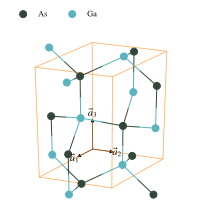

In [ ]:
poscar.splot_lat(eqv_sites=True,tol=0.35)

## KPOINTS
Provided that you export a POSCAR after relaxation, you can create KPOINTS based on that POSCAR as well (specifically for fermi surface and DOS), KPOINTS for bandstructure are just a relative thing. Good thing about this is KPOINTS labels and indices will be kept in header for post processing.

**Tip**: Use `pivotpy.KPathApp` to trace path visually by selecting points on figure.

In [ ]:
poscar.get_kmesh(2,2,1,cartesian=True) # KPOINTS are made on a rectangular grid for later easy processing

Generated uniform mesh using PivotPy, GRID-SHAPE = [2,2,1]
	4
Cartesian
   -0.2549385239   -0.2207832423   -0.1160314061    0.250000
    0.2549385239   -0.2207832423   -0.1160314061    0.250000
   -0.2549385239    0.2207832423   -0.1160314061    0.250000
    0.2549385239    0.2207832423   -0.1160314061    0.250000


In [ ]:
pp.str2kpath(
    '''
    0 0 0 ! G
    1 0 0 ! X
    
    1/2 1/2 0 ! M 3
    3/8 1/8 0 ! K
    ''',
    n = 10
)
# Note 3 after M, Only two kpoints are generated for that patch, first one got 10*distance(G,X) from n = 10, so total 13

Automatically generated using PivotPy with HSK-INDS = [0, 10, -1], LABELS = ['G', 'X|M', 'K'], SEG-INDS = [10]
	13
Reciprocal Lattice
    0.0000000000    0.0000000000    0.0000000000    0.076923
    0.1111111111    0.0000000000    0.0000000000    0.076923
    0.2222222222    0.0000000000    0.0000000000    0.076923
    0.3333333333    0.0000000000    0.0000000000    0.076923
    0.4444444444    0.0000000000    0.0000000000    0.076923
    0.5555555556    0.0000000000    0.0000000000    0.076923
    0.6666666667    0.0000000000    0.0000000000    0.076923
    0.7777777778    0.0000000000    0.0000000000    0.076923
    0.8888888889    0.0000000000    0.0000000000    0.076923
    1.0000000000    0.0000000000    0.0000000000    0.076923
    0.5000000000    0.5000000000    0.0000000000    0.076923
    0.4375000000    0.3125000000    0.0000000000    0.076923
    0.3750000000    0.1250000000    0.0000000000    0.076923


## INCAR, POTCAR, job.sh and Calculation
These files should be created by user in terminal.   
During structure relaxtion, you change `CONTCAR -> POSCAR` until required accuracy acheived. At end, do not forget to export POSCAR using `pp.POSCAR(path)` and write `KPOINTS` file as well based on that before calculating bandstructure/DOS/Fermi Surface etc.

# Post Processing
After your calculations, you are back to python for plotting etc. Use your own data, I will show examples from my data only.

**Tip**: Use `pivotpy.VasprunApp` to do output analysis visually as a pro.

## Bandstructure

**Tip** : In case you are dealing with plenty of files, your system's memory may not withstand with a lot of data. For such cases, `Vasprun` and `LOCPOT` can be used as context managers to release memeory once you exit context manager. e.g.
```python
with pp.Vasprun() as vr:
    vr.splot_bands()

# vr is no more

with pp.LOCPOT() as locpot:
    locpot.splot_e()

# locpot is no more 
```

<AxesSubplot:>

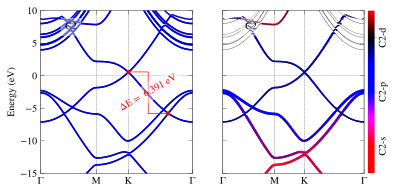

In [ ]:
vr = pp.Vasprun(r'E:\Research\graphene_example\ISPIN_1\bands\vasprun.xml')
ax1, ax2 = pp.get_axes((6,3),ncols=2, sharey=True)
vr.splot_bands(ax=ax1,elim=[-15,10])
diff = vr.get_en_diff(3,8)

vr.splot_en_diff(diff.coords,ax1,color='r',lw=0.7)
ax1.add_text(*diff.coords.mean(axis=0),f'ΔE = {diff.de:>6.3f} eV',colors='r',transform=False,rotation=30)
vr.splot_rgb_lines(ax=ax2,color_matrix = pp.rbg_matrix, elim=[-15,10])

## Density of States
You can load only DOS data with parameter `dos_only`. See below:

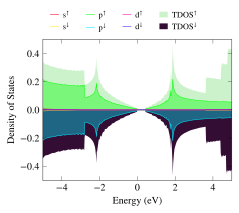

In [ ]:
vr1 = pp.Vasprun(r'E:\Research\graphene_example\ISPIN_2\dos\vasprun.xml', dos_only=True)
query_data = {'s':[[0,1],[0]], 'p':[[0,1],[1,2,3]], 'd':[[0,1],range(4,9)]}
ax = vr1.splot_dos_lines(query_data=query_data,elim=[-5,5])
ax.set(ylim=[-0.5,0.5],ylabel='Density of States',xlabel='Energy (eV)')
fig = vr1.iplot_dos_lines(query_data=query_data,elim=[-5,5]) # This appears later
fig.layout.xaxis.title = 'Energy (eV)'
fig.layout.yaxis.title = 'Density of States'
fig.layout.yaxis.range = [-0.5,0.5]
pp.iplot2html(fig,modebar=False) # This appears first

## Lattice and BZ
Beside matplotlib plots below, you can also use `poscar.iplot_<method>` to have interactive plotly graphs.

<AxesSubplot:xlabel='$k_x$', ylabel='$k_y$'>

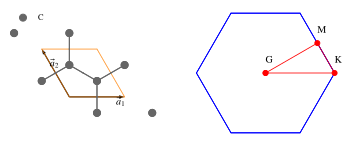

In [ ]:
poscar = vr.poscar
ax1, ax2 = pp.get_axes((6,3),ncols=2)
poscar.splot_lat(eqv_sites=True,tol=0.4,plane='xy',ax = ax1)
poscar.splot_bz(ax=ax2, plane='xy',vectors=False).set_axis_off()
poscar.splot_kpath(vertex=5,knn_inds=[0,5,3,0],labels=['','M\n','K\n','G\n'],color='r')

## Spin Texture
Although the DOS calculations are not intended to get spin texture/fermi surface, just to have an idea. Default values of parameters for `SpinDataFrame` are `band = 0, elements =[[0],], orbs = [[0],]` which you can tweak.

In [ ]:
df = pp.SpinDataFrame(path = r'E:\Research\graphene_example\ISPIN_2\dos\vasprun.xml')
df.describe() # This is data for band 0, ion 0 and orbital 0

 Found ISPIN = 2, output data got attributes spins.<u,d> instead of spins.<s,x,y,z>


,kx,ky,kz,band,eu,ed,su_0,sd_0
count,840.000000,840.000000,840.0,840.0,840.000000,840.000000,840.000000,840.000000
mean,0.006098,0.250000,0.0,1.0,-16.114411,-16.114409,0.280707,0.280707
std,0.288783,0.144424,0.0,0.0,1.779845,1.779844,0.019219,0.019219
min,-0.487805,0.000000,0.0,1.0,-19.247138,-19.247038,0.248900,0.248900
25%,-0.243902,0.121951,0.0,1.0,-17.649288,-17.649288,0.265500,0.265500
50%,0.012195,0.243902,0.0,1.0,-16.109438,-16.109438,0.277100,0.277100
75%,0.250000,0.365854,0.0,1.0,-14.607963,-14.607963,0.296150,0.296150
max,0.487805,0.487805,0.0,1.0,-12.481638,-12.481638,0.320300,0.320300


Since data is in positive y-plane only and we can translate back to equivalent kpoints, we can make it complete.

In [ ]:
df_m = df.copy()
df_m[['kx','ky','kz']] = -df[['kx','ky','kz']]
df1 = df.append(df_m)
df.send_metadata(df1) # Enforce metadata to be the same
df1[['kx','ky']] = df1[['kx','ky']].to_numpy() - df1[['kx','ky']].to_numpy().mean(axis=0) # Shift k-points to center, mesh was bad
df2 = df1.masked('eu',-15.5,0.04,n=100,band=1,method='linear')
df2

,kx,ky,kz,band,eu,ed,su_0,sd_0
271,-0.468096,0.211875,0.0,1.0,-15.466744,-15.466744,0.264993,0.264993
272,-0.468096,0.221729,0.0,1.0,-15.478591,-15.478591,0.265036,0.265036
273,-0.468096,0.231584,0.0,1.0,-15.479905,-15.479905,0.265036,0.265036
274,-0.468096,0.241439,0.0,1.0,-15.479905,-15.479905,0.265036,0.265036
275,-0.468096,0.251293,0.0,1.0,-15.474476,-15.474476,0.265014,0.265014
...,...,...,...,...,...,...,...,...
9724,0.468096,-0.251293,0.0,1.0,-15.474476,-15.474476,0.265014,0.265014
9725,0.468096,-0.241439,0.0,1.0,-15.478591,-15.478591,0.265036,0.265036
9726,0.468096,-0.231584,0.0,1.0,-15.477410,-15.477410,0.265036,0.265036
9727,0.468096,-0.221729,0.0,1.0,-15.477410,-15.477410,0.265036,0.265036


Text(0.5, 1.0, '$S_\\uparrow (C_1-s)$, color shows $E_\\uparrow$')

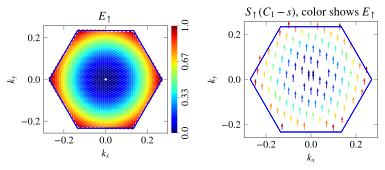

In [ ]:
ax1, ax2 = pp.get_axes((6,3),ncols=2,wspace= 0.5)
df1.poscar.splot_bz(plane='xy',vectors=False,ax=ax1)
df1.poscar.splot_bz(plane='xy',vectors=False,ax=ax2)
df1.splot('kx','ky','eu',ax=ax1,cmap = 'jet',s=3,marker='H')
df1.colorbar(nticks=4) # Only after an splot
ax1.set_title('$E_\\uparrow$')

df1.splot('kx','ky','eu',arrows=['','su_0','eu'], every=15,quiver_kws = dict(cmap='jet',scale=5,linewidth=8),ax=ax2)
#df1.colorbar()
ax2.set_title('$S_\\uparrow (C_1-s)$, color shows $E_\\uparrow$')

Text(0.5, 0.92, '$E_\\uparrow $ with $S_\\uparrow (C_1-s)$ in 3D')

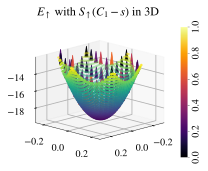

In [ ]:
df['kz'] = 0
ax = df1.splot3d('kx','ky','eu',s=3)
df1.splot3d('kx','ky','eu',arrows=['','','su_0'],norm=5,every=11,quiver_kws= dict(arrowstyle='wedge',cmap='inferno',zorder=-5),ax=ax)
df1.colorbar()
ax.set_title('$E_\\uparrow $ with $S_\\uparrow (C_1-s)$ in 3D')


Text(0.5, 1.0, '$S_\\uparrow (C_1-s), -15.46 < E_\\uparrow < 15.54$')

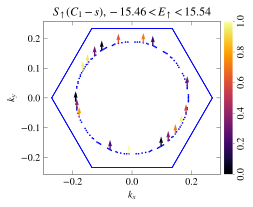

In [ ]:
ax = df2.poscar.splot_bz(plane='xy',vectors=False)
df2.splot('kx','ky','eu',ax=ax,color='b',s=0.5)
df2.splot('kx','ky','eu',arrows=['','su_0','su_0'], every=7,quiver_kws = dict(cmap='inferno'),ax=ax)
df2.colorbar(digits=3)
ax.set_title('$S_\\uparrow (C_1-s), -15.46 < E_\\uparrow < 15.54$')

There is plenty of options for plotting in matplotlib, plotly, myavi etc, so having a `SpinDataFrame` ready, you can plot 2D/3D surfaces/spin textures the way you want. Making a way fixed is not a good idea. For example, try `matplotlib.pyplot.tricontourf` instead of above scattered plot. For 3D surfaces, try plotly Mesh, Isosurface etc and whatever suits you best.

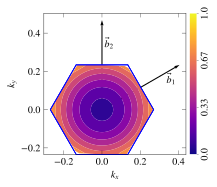

In [ ]:
import matplotlib.tri as tri
import numpy as np
ax = pp.get_axes()
data = df1.get_data().band_1
KPTS = np.array([data.kx,data.ky,data.kz]).T
KPTS[:,2] = 0
df1.poscar.splot_bz(plane='xy',ax=ax)
tri1 = tri.Triangulation(*KPTS.T[:2])
ax.tricontourf(tri1, data.eu, levels=np.linspace(-20, -10, 10), cmap='plasma')
ax.add_colorbar(None,'plasma',ticks=np.linspace(-20,-10,4))

### Cartesian Rectangular Mesh
If load your poscar and create cartesian kmesh, that is very useful for plotting easily later.
```python
pos = pp.POSCAR('Your/POSCAR')
pos.get_kmesh(8,8,1,cartesian=True)
```
Do culculation on this and process and see how to plot it so easily. 

<AxesSubplot:xlabel='$k_x$', ylabel='$k_y$'>

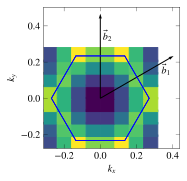

In [ ]:
sdf = pp.SpinDataFrame(path = r'E:\Research\cart\vasprun.xml')
ax = sdf.splot('kx','ky','e',s=200,marker='s')
sdf.poscar.splot_bz(plane='xy',ax =ax)

-0.30863575303677104 0.30863575303677104 -0.2713056717441632 0.2713056717441632


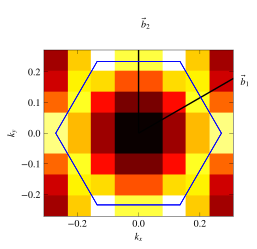

In [ ]:
import matplotlib.pyplot as plt
image = sdf['e'].to_numpy().reshape((8,8))
ax = sdf.poscar.splot_bz(plane='xy')
XYZ = sdf.poscar.bring_in_bz(sdf[['kx','ky','kz']].to_numpy(),sys_info = sdf.sys_info)
x1, y1, _ = XYZ.min(axis=0) - 0.03 # imshow do not scale properly with coordinates
x2, y2, _ = XYZ.max(axis=0) + 0.03
print(x1,x2,y1,y2)
# Infact limits for hexagonal lattice should be [-0.25,0.25] and [-0.3333,0.3333] in units of 2pi
# But grid is not exactly terminated at the edges of the hexagonal lattice
ax.imshow(image,cmap='hot',interpolation='nearest', extent=[x1,x2,y1,y2])